In [1]:
from math import sin, cos, sqrt, fabs

from numba import jit
import numpy as np
import pandas as pd

In [2]:
@jit
def clifford(x, y, a, b, c, d, *o):
    return (sin(a * y) + c * cos(a * x), sin(b * x) + d * cos(b * y))

In [3]:
n = 10_000_000

@jit
def trajectory_coords(fn, x0, y0, a, b=0, c=0, d=0, e=0, f=0, n=n):
    x, y = np.zeros(n), np.zeros(n)
    x[0], y[0] = x0, y0
    for i in np.arange(n-1):
        x[i+1], y[i+1] = fn(x[i], y[i], a, b, c, d, e, f)
    return x, y


def trajectory(fn, x0, y0, a, b=0, c=0, d=0, e=0, f=0, n=n):
    x, y = trajectory_coords(fn, x0, y0, a, b, c, d, e, f, n)
    return pd.DataFrame(dict(x=x, y=y))


df = trajectory(clifford, 0, 0, -1.3, -1.3, -1.8, -1.9)

In [4]:
import datashader as ds

In [5]:
cvs = ds.Canvas(plot_width=800, plot_height=800)
agg = cvs.points(df, "x", "y")

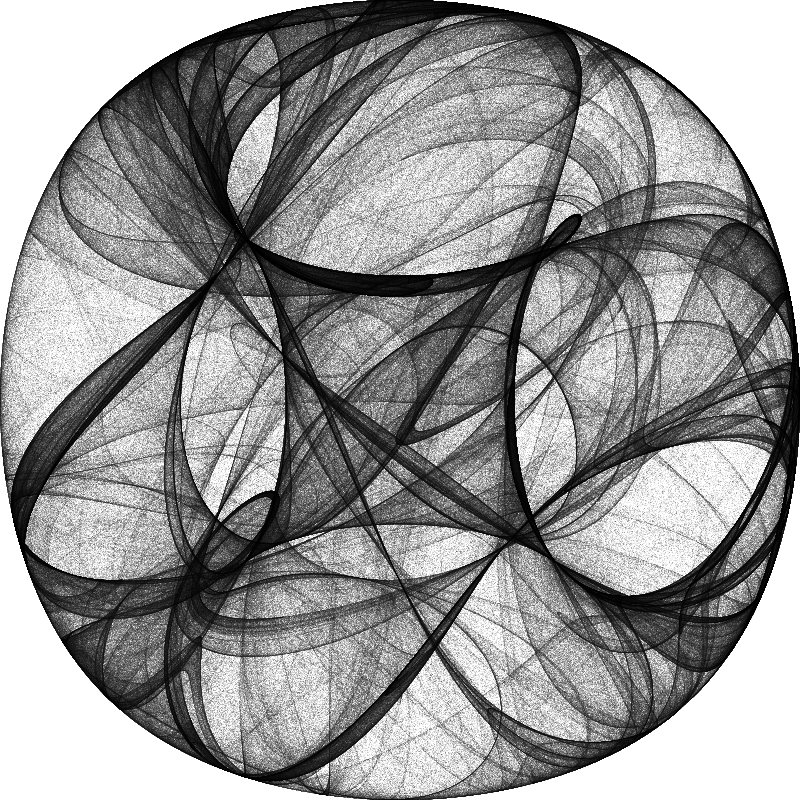

In [6]:
ds.transfer_functions.Image.border=0

ds.tf.shade(agg, cmap = ["white", "black"])

In [7]:
from datashader.colors import inferno, viridis


def dsplot(fn, vals, n=n, cmap=viridis, label=True):
    lab = ("{}, "*(len(vals)+1)+" {}").format(*vals) if label else None
    df = trajectory(fn, *vals, n=n)
    cvs = ds.Canvas(plot_width = 300, plot_height = 300)
    agg = cvs.points(df, "x", "y")
    img = ds.tf.shade(agg, cmap=cmap, name=lab)
    return img

In [8]:
from colorcet import palette

palette["viridis"]=viridis
palette["inferno"]=inferno

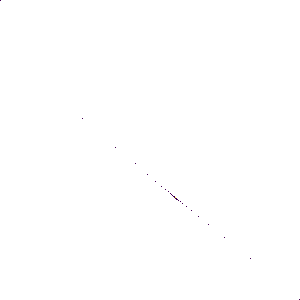

In [9]:
dsplot(clifford, (-1.4, 1.6, 1.0, 0.7), cmap=viridis, label=None)